In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
# Set the constants
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS=10

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'hinh/train', 
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
val_ds =  tf.keras.preprocessing.image_dataset_from_directory(
     r'hinh/validation', 
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
test_ds =  tf.keras.preprocessing.image_dataset_from_directory(
     r'hinh/test', 
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3077 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [4]:
class_names = train_ds.class_names
class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [5]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[ 5  0 18 13 17 27 20 10 34 31  8 21  3 31 19 27 34 12 20 11 31 26 24 20
 29  1 26  8 11  7 30 33]


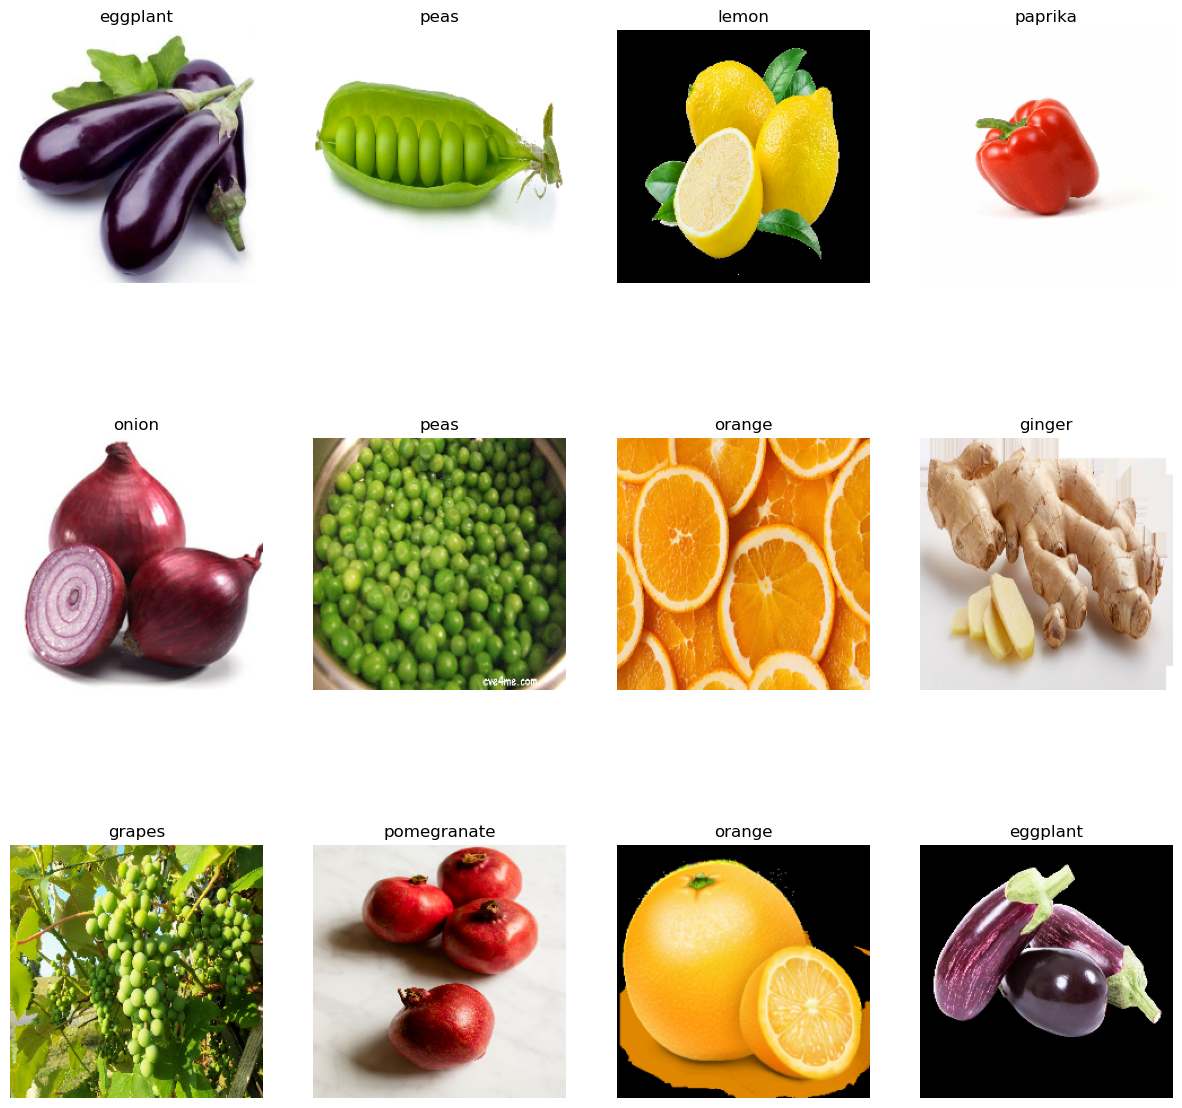

In [6]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./IMAGE_SIZE),
])

In [8]:
# augment data
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [9]:
#applying data augmentation to train dataset
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.map(
    lambda x, y: (data_augmentation(x, training=False), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.map(
    lambda x, y: (data_augmentation(x, training=False), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


In [10]:
# build CNN model
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(25, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(50,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(50,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(50, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(50, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(50, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 25)        700       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 111, 111, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 50)        11300     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 54, 54, 50)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 52, 52, 50)         

In [12]:
# Compiling the Model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=100,
)

Epoch 1/100
97/97 [==============================] - 226s 2s/step - loss: 3.5607 - accuracy: 0.0393 - val_loss: 3.4295 - val_accuracy: 0.0627
Epoch 2/100
97/97 [==============================] - 170s 2s/step - loss: 3.3138 - accuracy: 0.0582 - val_loss: 3.1000 - val_accuracy: 0.0826
Epoch 3/100
97/97 [==============================] - 237s 2s/step - loss: 3.0899 - accuracy: 0.0998 - val_loss: 2.8176 - val_accuracy: 0.1425
Epoch 4/100
97/97 [==============================] - 245s 2s/step - loss: 2.7139 - accuracy: 0.1677 - val_loss: 2.2810 - val_accuracy: 0.2450
Epoch 5/100
97/97 [==============================] - 238s 2s/step - loss: 2.5220 - accuracy: 0.2012 - val_loss: 2.2759 - val_accuracy: 0.2422
Epoch 6/100
97/97 [==============================] - 167s 2s/step - loss: 2.4532 - accuracy: 0.2298 - val_loss: 2.0399 - val_accuracy: 0.3732
Epoch 7/100
97/97 [==============================] - 168s 2s/step - loss: 2.3583 - accuracy: 0.2642 - val_loss: 1.9552 - val_accuracy: 0.3447
Epoch 

97/97 [==============================] - 131s 1s/step - loss: 1.2260 - accuracy: 0.6045 - val_loss: 0.7971 - val_accuracy: 0.7179
Epoch 59/100
97/97 [==============================] - 129s 1s/step - loss: 1.1509 - accuracy: 0.6341 - val_loss: 0.7735 - val_accuracy: 0.7464
Epoch 60/100
97/97 [==============================] - 131s 1s/step - loss: 1.1435 - accuracy: 0.6217 - val_loss: 0.8137 - val_accuracy: 0.7293
Epoch 61/100
97/97 [==============================] - 126s 1s/step - loss: 1.1899 - accuracy: 0.6149 - val_loss: 0.8458 - val_accuracy: 0.7350
Epoch 62/100
97/97 [==============================] - 123s 1s/step - loss: 1.1334 - accuracy: 0.6383 - val_loss: 0.7828 - val_accuracy: 0.7407
Epoch 63/100
97/97 [==============================] - 124s 1s/step - loss: 1.1194 - accuracy: 0.6341 - val_loss: 0.7698 - val_accuracy: 0.7265
Epoch 64/100
97/97 [==============================] - 126s 1s/step - loss: 1.1467 - accuracy: 0.6269 - val_loss: 0.9010 - val_accuracy: 0.6923
Epoch 65/100

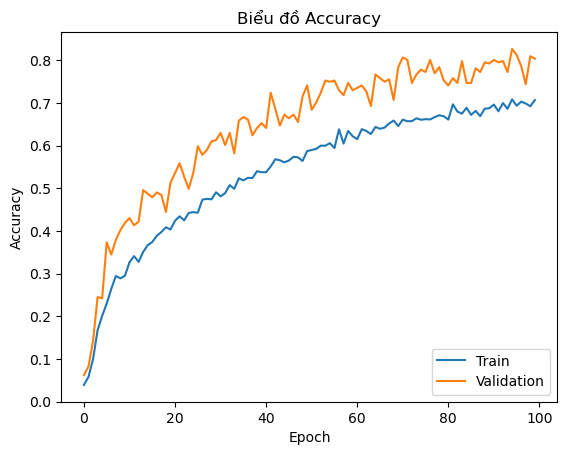

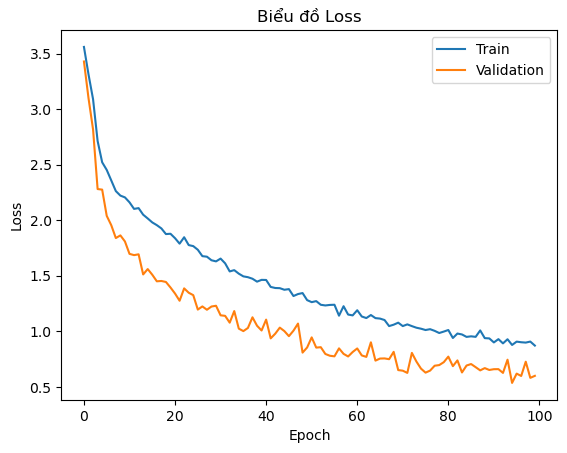

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Biểu đồ Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Biểu đồ Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [25]:
def evaluate_model(model, test_ds):
    loss, accuracy= model.evaluate(test_ds)
    print("Test set accuracy: {:.2f}%".format(accuracy * 100))

In [26]:
evaluate_model(model, test_ds)

12/12 [==============================] - 6s 232ms/step - loss: 0.5985 - accuracy: 0.8050
Test set accuracy: 80.50%


In [18]:
# save model
model.save("cnn_model.h5")
print("Model saved!")

Model saved!


In [39]:
from sklearn import metrics
import seaborn as sns

In [40]:
def ConfusionMatrix(model, ds, label_list):
# Note: This logic doesn't work with shuffled datasets
    plt.figure(figsize=(15,10))
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)
    true_categories = tf.concat([y for x, y in ds], axis=0)
    cm = metrics.confusion_matrix(true_categories,predicted_categories) # last batch 
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
    plt.show()

12/12 [==============================] - 7s 267ms/step


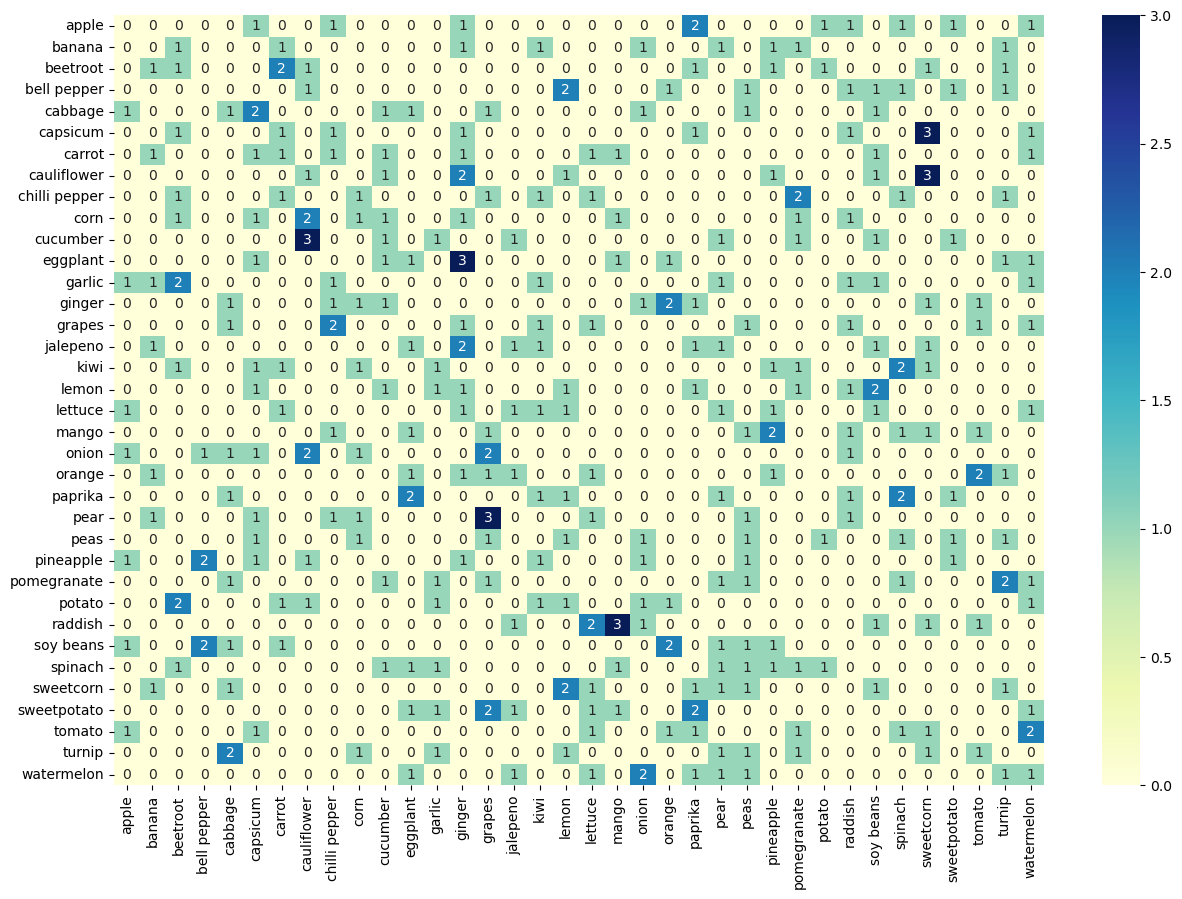

In [43]:
ConfusionMatrix(model, test_ds, class_names)